<a href="https://colab.research.google.com/github/AbhijeetKD20/Guvi-Assignments/blob/main/Guvi_Decision_Trees_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
dataset =pd.read_csv("breast-cancer.csv")
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
dataset.shape

(569, 32)

In [ ]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#Checking for datatypes
dataset.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
dataset.drop(["id"], axis = 1)  # dropping the "id" column

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Defining the variables
X = dataset.loc[:, dataset.columns[2:]]
y = dataset["diagnosis"]
y = y.map({"M":1, "B":0})

In [ ]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
print(y) #B:0, M:1

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [ ]:
#Splitting of data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

## **Decision Tree Fitting**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Create an object for DecisionTreeClassifier naming "classifier" with a max depth
classifier = DecisionTreeClassifier()

#fitting model to X_train, y_train
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Here after fitting the D.T to the training model, it will ask all possible questions, compute the information gain and and choose the best split.

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0])

## **Evaluating a decision tree**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix
#we compute the eval metric on test/validation set only primarily
cm = confusion_matrix(y_test,y_pred)
print("confusion_matrix",
      cm)
print("Accuracy",accuracy_score(y_test, y_pred)) 

confusion_matrix [[60  7]
 [ 4 43]]
Accuracy 0.9035087719298246


Test Set Accuracy:0.90
Test Set AUC:0.91
Train Set AUC : 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


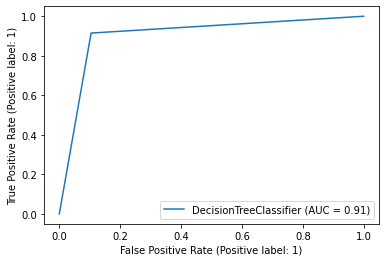

In [ ]:
#Computing the accuracy
acc = accuracy_score(y_test,y_pred)
print("Test Set Accuracy:{:.2f}".format(acc))

#Computing the roc_auc_score
acc= roc_auc_score(y_test, y_pred)
print("Test Set AUC:{:.2f}".format(acc))

#roc_curve
plot_roc_curve(classifier, X_test, y_test)

acc = roc_auc_score(y_train, classifier.predict(X_train))
print("Train Set AUC :", acc)

##**Overfitting and Underfitting in D.Ts **

Overfitting and Underfitting can be controlled in D.Ts by actually limiting the growth of the tree i.e controling the levels. This method is known as **Pruning**.

The hyperparameter is the max_depth.

Pruning is of two types:

1.Pre-pruning : max_depth is decided before the complete growth of the DT

2.Post-pruning : max_depth is decided after the complete growth of the DT.

## **Reducing Overfitting**

In [ ]:
###there are 1 param to play with - max depth - to choose the best parameter, I will try different 
#combinations and choose the one which has the best accuracy/auc/any eval metric on cross-validation 
#or test data-set

from sklearn.model_selection import cross_val_score #cross_validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  classifier = DecisionTreeClassifier(max_depth = depth) # threshold to limit the growth of the DT
  classifier.fit(X_train, y_train) #model is trained

  #fresh model which is not trained
  classifier_new = DecisionTreeClassifier(max_depth = depth)
  
  val_Accuracy = cross_val_score(classifier_new, X_train, y_train, cv = 10) #syntax : cross_val_score(model object, fts, target, cv= 5 or 10 )
  print("Depth:",depth, "Cross_Val_score", np.mean(val_Accuracy))

Depth: 1 Cross_Val_score 0.883671497584541
Depth: 2 Cross_Val_score 0.9254589371980677
Depth: 3 Cross_Val_score 0.929855072463768
Depth: 4 Cross_Val_score 0.9276811594202898
Depth: 5 Cross_Val_score 0.9363285024154588
Depth: 6 Cross_Val_score 0.9341545893719807
Depth: 7 Cross_Val_score 0.9385507246376813
Depth: 8 Cross_Val_score 0.9318357487922706
Depth: 9 Cross_Val_score 0.9208695652173914
Depth: 10 Cross_Val_score 0.9363285024154591
Depth: 20 Cross_Val_score 0.9254589371980677


With highest cross_val_score of 0.919266, my hyperparameter max_depth value is to be 6.

## **Visualising the Decision Boundary**

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


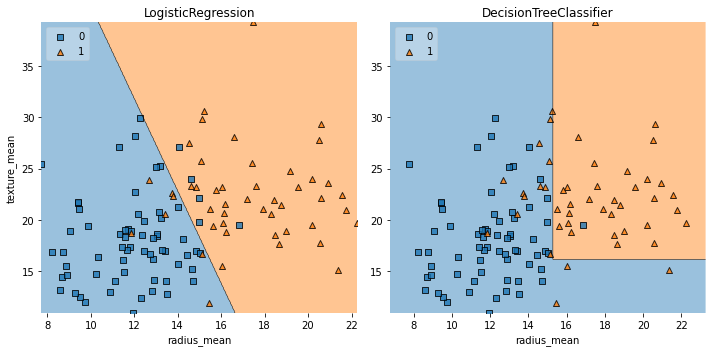

In [ ]:
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(max_depth=2)
X_train = X_train.loc[:,['radius_mean', 'texture_mean']]
X_test = X_test.loc[:,['radius_mean', 'texture_mean']]
dt.fit(X_train, y_train)

# Instantiate logreg
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

Here we can see due to the absence of a linear decision boundary, LogisticRegression is a failure, but D.T has been successful as it is not dependent on a linear decision boundary.

## **Feature Importances**

In majority of application of ML models on datasets, the main interest is not to build a model, but to recognize the importance of the features. **Our main objective is to find out which features impact is the most to the target variable.**

Only after that you know how to deal with the initial problem statement.

To find the relationship between two features, one method is to find using **correlation method**.

But correlation can only measure the linear relationship between features. So any corr() values between -0.2 to 0.2 is useless to linear relationship. But the importance doens't decreases.

**So corr() isn't an effective metric for feature importances if it isn't linear.**

To know the feature importances, we need to compare within themselves. To do this, first we need all the features under the same range or scale.

 **So Feature Scaling is the first step for prediction of Feature Importances.** But D.Ts have an exception in this case.

One Advantage of D.Ts is that here you have only one line code to find the feature_importances without even doing Feature scaling.

(D.T model object name).eure_importances_ will give you the necessary info

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

classifier = DecisionTreeClassifier(max_depth = 6)  #max_depth as decided in above by comparing cross_val_score
classifier.fit(X_train, y_train)

importance = classifier.feature_importances_
list(zip(importance, X_test.columns))  # it calculates the feature importances based on Information Gain

[(0.0, 'radius_mean'),
 (0.0525422204833589, 'texture_mean'),
 (0.0, 'perimeter_mean'),
 (0.006413742794817788, 'area_mean'),
 (0.013403332465950492, 'smoothness_mean'),
 (0.0, 'compactness_mean'),
 (0.0, 'concavity_mean'),
 (0.0, 'concave points_mean'),
 (0.003135607588577613, 'symmetry_mean'),
 (0.0, 'fractal_dimension_mean'),
 (0.0030290078880539375, 'radius_se'),
 (0.006413742794817788, 'texture_se'),
 (0.0, 'perimeter_se'),
 (0.0, 'area_se'),
 (0.0014953641092499397, 'smoothness_se'),
 (0.0, 'compactness_se'),
 (0.0, 'concavity_se'),
 (0.006413742794817788, 'concave points_se'),
 (0.0, 'symmetry_se'),
 (0.0, 'fractal_dimension_se'),
 (0.6983024049408857, 'radius_worst'),
 (0.052578853776815315, 'texture_worst'),
 (0.0, 'perimeter_worst'),
 (0.0, 'area_worst'),
 (0.009408918760110137, 'smoothness_worst'),
 (0.0, 'compactness_worst'),
 (0.0, 'concavity_worst'),
 (0.1374915969233968, 'concave points_worst'),
 (0.009371464679147687, 'symmetry_worst'),
 (0.0, 'fractal_dimension_worst')

This shows the feature_importance_score in percentage scores. So we can see that "concave points_worst" ft has the highest val of 0.734.

In [ ]:
#zip function
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]

## **Visualisisng the Tree**

[Text(0.6009615384615384, 0.9285714285714286, 'X[20] <= 16.795\ngini = 0.461\nsamples = 455\nvalue = [291, 164]'),
 Text(0.3942307692307692, 0.7857142857142857, 'X[27] <= 0.136\ngini = 0.145\nsamples = 304\nvalue = [280, 24]'),
 Text(0.21153846153846154, 0.6428571428571429, 'X[28] <= 0.157\ngini = 0.029\nsamples = 269\nvalue = [265, 4]'),
 Text(0.17307692307692307, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.5, 'X[10] <= 0.643\ngini = 0.022\nsamples = 268\nvalue = [265, 3]'),
 Text(0.15384615384615385, 0.35714285714285715, 'X[14] <= 0.003\ngini = 0.015\nsamples = 265\nvalue = [263, 2]'),
 Text(0.07692307692307693, 0.21428571428571427, 'X[1] <= 19.9\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.038461538461538464, 0.07142857142857142, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.11538461538461539, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.21428571428571427, 'X[21] <= 33.35\ngini = 0.008\nsamples = 259\

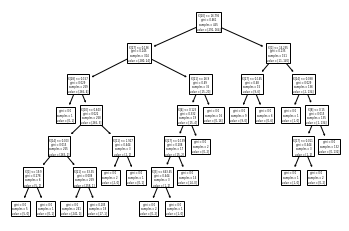

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)  #classifier is the decision tree that I have learnt

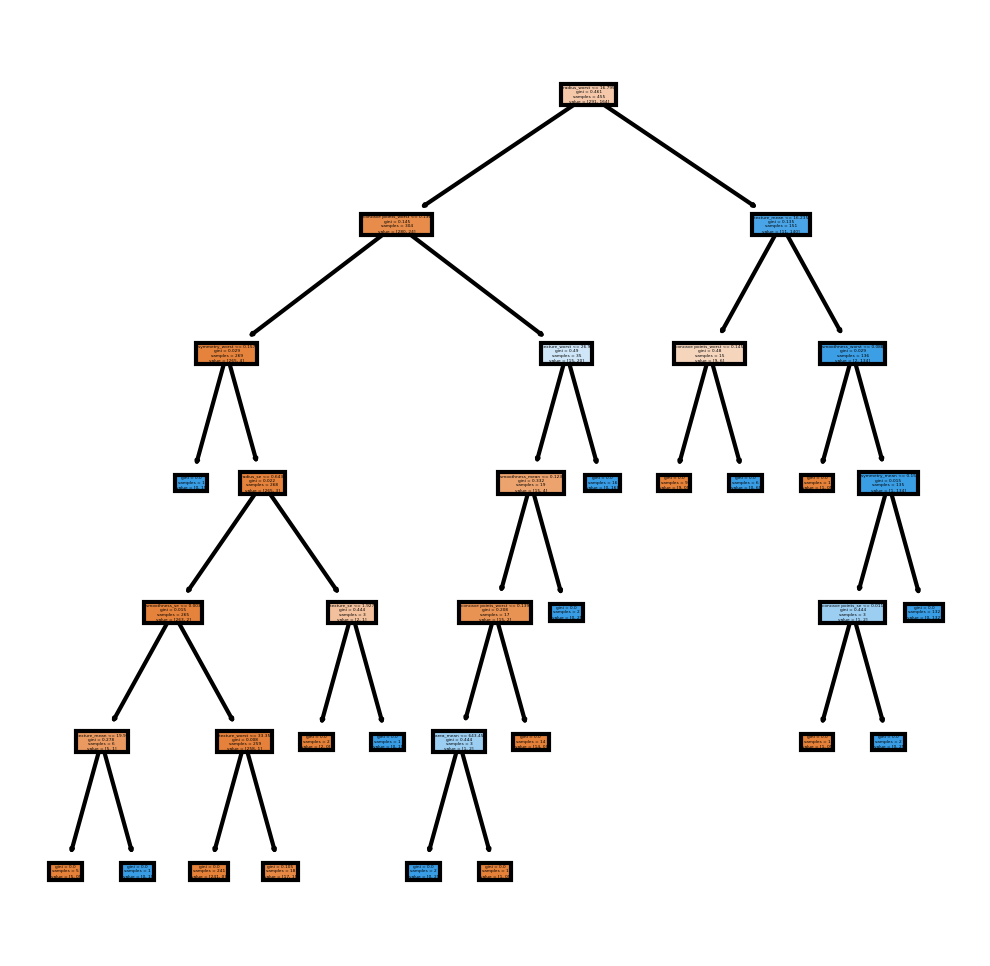

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(4,4), dpi = 300)
tree.plot_tree(classifier,
               feature_names = X_test.columns,
               filled = True);
fig.savefig("imagename.png")               

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train_X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# from sklearn.tree import DecisionTreeClassifier
classifier_1 = DecisionTreeClassifier(max_depth= 2)
classifier_1.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[20] <= 16.795\ngini = 0.461\nsamples = 455\nvalue = [291, 164]'),
 Text(0.25, 0.5, 'X[27] <= 0.136\ngini = 0.145\nsamples = 304\nvalue = [280, 24]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.029\nsamples = 269\nvalue = [265, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.49\nsamples = 35\nvalue = [15, 20]'),
 Text(0.75, 0.5, 'X[1] <= 16.235\ngini = 0.135\nsamples = 151\nvalue = [11, 140]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.029\nsamples = 136\nvalue = [2, 134]')]

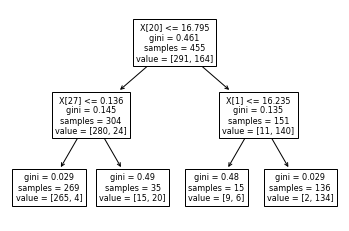

In [ ]:
tree.plot_tree(classifier_1)

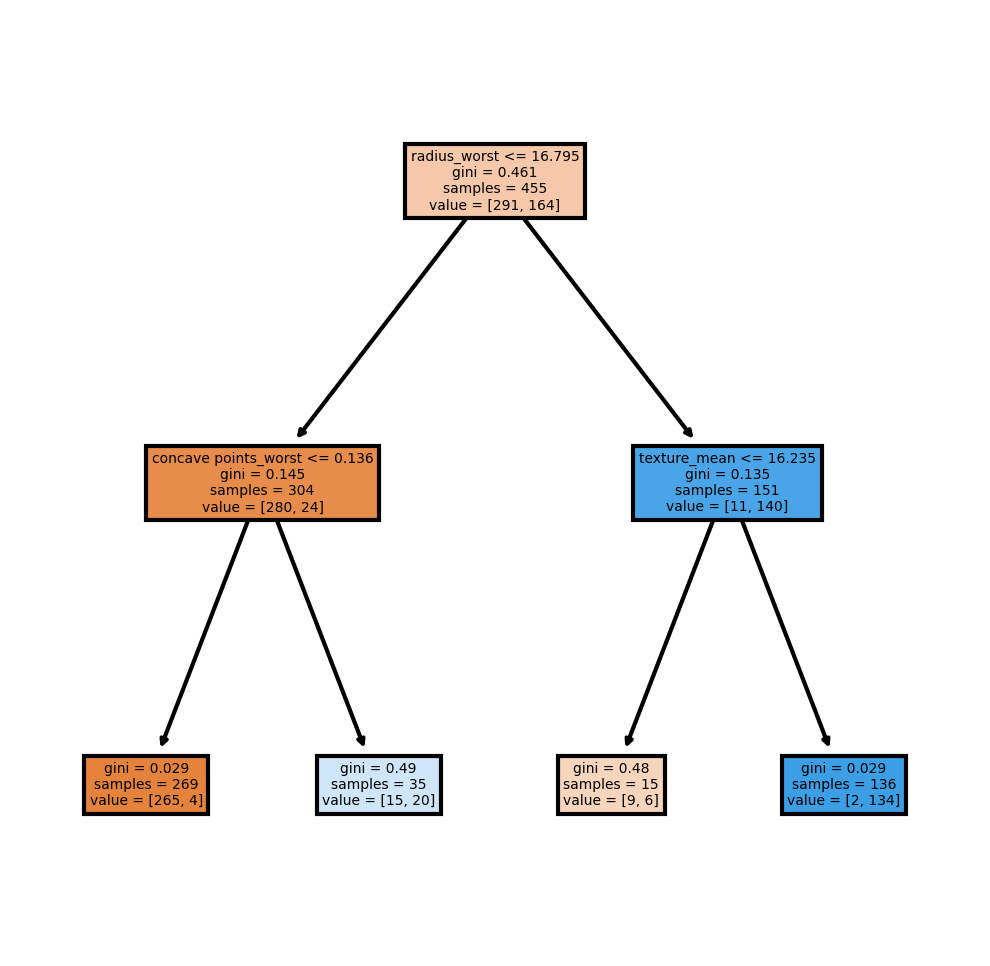

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(4,4), dpi = 300)
tree.plot_tree(classifier_1,
               feature_names = X_test.columns,
               filled = True);
fig.savefig("imagename.png")   